In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
pd.options.display.float_format = '{:.2f}'.format

**Data loading**

In [2]:
df=pd.read_csv("Accounts_Receivable.csv")

In [3]:
df.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4


In [4]:
df.shape

(2466, 12)

In [5]:
df.describe()

,countryCode,invoiceNumber,InvoiceAmount,DaysToSettle,DaysLate
count,2466.00,2466.00,2466.00,2466.00,2466.00
mean,620.45,4978430514.97,59.90,26.44,3.44
std,215.93,2884271865.47,20.44,12.33,6.29
min,391.00,611365.00,5.26,0.00,0.00
25%,406.00,2528853991.00,46.40,18.00,0.00
50%,770.00,4964228313.50,60.56,26.00,0.00
75%,818.00,7494512439.00,73.77,35.00,5.00
max,897.00,9990243864.00,128.28,75.00,45.00


In [6]:
df.dtypes

countryCode        int64
customerID        object
PaperlessDate     object
invoiceNumber      int64
InvoiceDate       object
DueDate           object
InvoiceAmount    float64
Disputed          object
SettledDate       object
PaperlessBill     object
DaysToSettle       int64
DaysLate           int64
dtype: object

In [7]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['DueDate']=pd.to_datetime(df['DueDate'])
df['SettledDate']=pd.to_datetime(df['SettledDate'])

In [8]:
df['Actual_aging']=df['DueDate']-df['InvoiceDate']
df['Actual_aging'] = df['Actual_aging'].dt.days.astype('int16')

In [9]:
df.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Actual_aging
0,391,0379-NEVHP,4/6/2013,611365,2013-01-02,2013-02-01,55.94,No,2013-01-15,Paper,13,0,30
1,406,8976-AMJEO,3/3/2012,7900770,2013-01-26,2013-02-25,61.74,Yes,2013-03-03,Electronic,36,6,30
2,391,2820-XGXSB,1/26/2012,9231909,2013-07-03,2013-08-02,65.88,No,2013-07-08,Electronic,5,0,30
3,406,9322-YCTQO,4/6/2012,9888306,2013-02-10,2013-03-12,105.92,No,2013-03-17,Electronic,35,5,30
4,818,6627-ELFBK,11/26/2012,15752855,2012-10-25,2012-11-24,72.27,Yes,2012-11-28,Paper,34,4,30


In [10]:
df.nunique()

countryCode         5
customerID        100
PaperlessDate      91
invoiceNumber    2466
InvoiceDate       681
DueDate           681
InvoiceAmount    2098
Disputed            2
SettledDate       695
PaperlessBill       2
DaysToSettle       67
DaysLate           37
Actual_aging        1
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x24b9a07a7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x24b9a07ae50>,
 'boxes': [<matplotlib.lines.Line2D at 0x24b9a07a3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x24b9a0935b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24b9a093940>],
 'means': []}

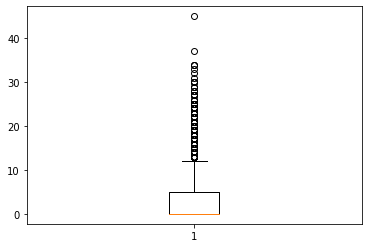

In [11]:
plt.boxplot(df['DaysLate'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24b9a16dbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x24b9a179340>,
 'boxes': [<matplotlib.lines.Line2D at 0x24b9a16d850>],
 'medians': [<matplotlib.lines.Line2D at 0x24b9a179a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x24b9a179d90>],
 'means': []}

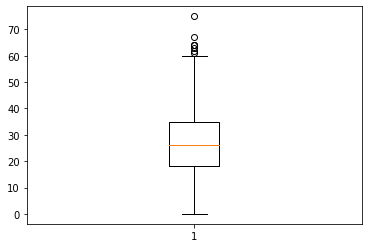

In [12]:
plt.boxplot(df['DaysToSettle'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24b9a252700>,
 'caps': [<matplotlib.lines.Line2D at 0x24b9a252e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x24b9a252370>],
 'medians': [<matplotlib.lines.Line2D at 0x24b9a25d580>],
 'fliers': [<matplotlib.lines.Line2D at 0x24b9a25d910>],
 'means': []}

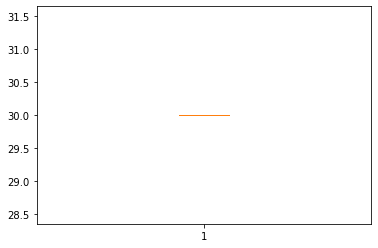

In [14]:
plt.boxplot(df['Actual_aging'])

In [15]:
df['Actual_aging'].describe()

count   2466.00
mean      30.00
std        0.00
min       30.00
25%       30.00
50%       30.00
75%       30.00
max       30.00
Name: Actual_aging, dtype: float64

In [16]:
df.groupby('PaperlessBill').DaysLate.mean()

PaperlessBill
Electronic   2.39
Paper        4.44
Name: DaysLate, dtype: float64

<AxesSubplot:title={'center':'Inv_count by customer'}, ylabel='Frequency'>

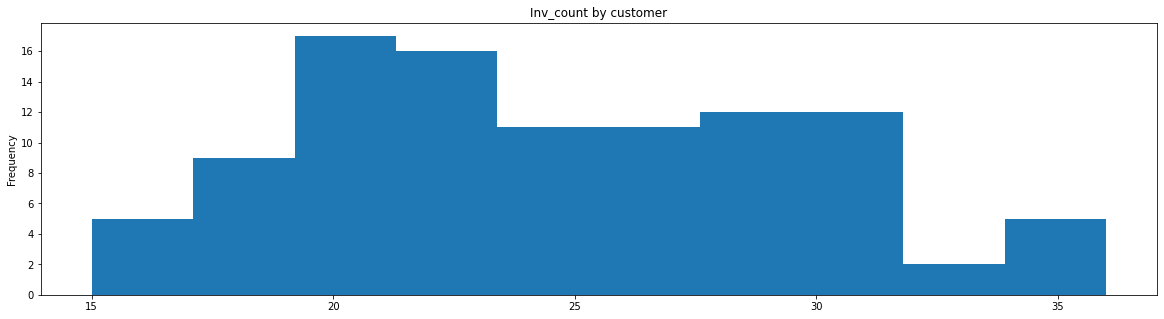

In [17]:
customerID_dayslate=df.groupby('customerID').invoiceNumber.count()

customerID_dayslate.plot(kind='hist', title='Inv_count by customer', ylabel='Inv_count',
         xlabel='CustomerID', figsize=(20, 5))

In [18]:
customerID_dayslate=pd.DataFrame(customerID_dayslate).reset_index()

In [19]:
customerID_dayslate.columns

Index(['customerID', 'invoiceNumber'], dtype='object')

In [ ]:
# def customer_bucket(x):
#     if x<=1:
#         return "Low_Delay_cust"
#     elif x>1 and x<=7:
#             return "Medium_delay_cust"
#     else:
#             return "Late_cust"           

In [ ]:
# customerID_dayslate['cust_delay_bucket']=customerID_dayslate.apply(lambda x:customer_bucket(x['DaysLate']),axis=1)

In [ ]:
# customerID_dayslate['cust_delay_bucket'].value_counts()

In [20]:
df1=pd.merge(df,customerID_dayslate,on=['customerID'],how='left')

In [21]:
df1.head()

,countryCode,customerID,PaperlessDate,invoiceNumber_x,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Actual_aging,invoiceNumber_y
0,391,0379-NEVHP,4/6/2013,611365,2013-01-02,2013-02-01,55.94,No,2013-01-15,Paper,13,0,30,27
1,406,8976-AMJEO,3/3/2012,7900770,2013-01-26,2013-02-25,61.74,Yes,2013-03-03,Electronic,36,6,30,27
2,391,2820-XGXSB,1/26/2012,9231909,2013-07-03,2013-08-02,65.88,No,2013-07-08,Electronic,5,0,30,24
3,406,9322-YCTQO,4/6/2012,9888306,2013-02-10,2013-03-12,105.92,No,2013-03-17,Electronic,35,5,30,19
4,818,6627-ELFBK,11/26/2012,15752855,2012-10-25,2012-11-24,72.27,Yes,2012-11-28,Paper,34,4,30,27


In [22]:
df1.dtypes

countryCode                 int64
customerID                 object
PaperlessDate              object
invoiceNumber_x             int64
InvoiceDate        datetime64[ns]
DueDate            datetime64[ns]
InvoiceAmount             float64
Disputed                   object
SettledDate        datetime64[ns]
PaperlessBill              object
DaysToSettle                int64
DaysLate                    int64
Actual_aging                int16
invoiceNumber_y             int64
dtype: object

***Correlation***

In [28]:
corrdata=df1.select_dtypes(exclude=['object'])
exc_columns=['countryCode','invoiceNumber_x','invoiceNumber_y','InvoiceDate','DueDate','SettledDate','Actual_aging']
corrdata=corrdata.drop(exc_columns,axis='columns')

In [29]:
corrdata.head()

,InvoiceAmount,DaysToSettle,DaysLate
0,55.94,13,0
1,61.74,36,6
2,65.88,5,0
3,105.92,35,5
4,72.27,34,4


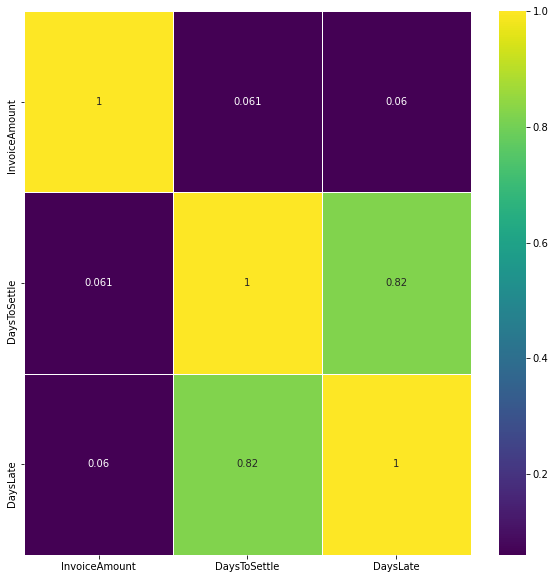

In [30]:
corremat = corrdata.corr()
plt.figure(figsize=(10,10))
g= sns.heatmap(corrdata.corr(),annot=True,cmap='viridis',linewidths=.5)

In [32]:
def numeric_to_categoric(x):
    if x == 0: return "0 days"
    elif x <= 2: return "(0-2] days"
    elif x <= 4: return "(2-4] days"
    elif x <= 6: return "(4-6] days"
    elif x <= 8: return "(6-8] days"
    elif x <= 10: return "(8-10] days"
    else: return "(10-) days"
df1['DaysLate'] = df1['DaysLate'].apply(numeric_to_categoric)

<AxesSubplot:title={'center':'DaysLate'}>

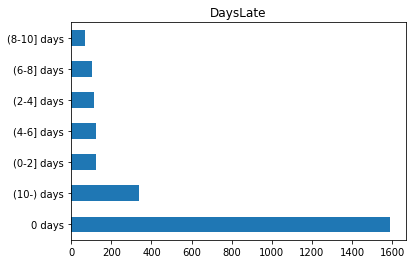

In [33]:
df1['DaysLate'].value_counts().plot(kind='barh', title='DaysLate')

In [34]:
df1['countryCode']=df1['countryCode'].astype(str)

In [41]:
col_to_drop=['Actual_aging','invoiceNumber_x','customerID','InvoiceDate','DueDate','SettledDate','PaperlessDate','DaysToSettle']
df2=df1.drop(col_to_drop,axis=1)

In [42]:
df2.head()

,countryCode,InvoiceAmount,Disputed,PaperlessBill,DaysLate,invoiceNumber_y
0,391,55.94,No,Paper,0 days,27
1,406,61.74,Yes,Electronic,(4-6] days,27
2,391,65.88,No,Electronic,0 days,24
3,406,105.92,No,Electronic,(4-6] days,19
4,818,72.27,Yes,Paper,(2-4] days,27


In [43]:
df2['Disputed'].replace({"Yes":1,"No":0},inplace=True)
df2['PaperlessBill'].replace({"Paper":1,"Electronic":0},inplace=True)

In [45]:
col_to_dummy=['countryCode']
df3=pd.get_dummies(data=df2,columns=col_to_dummy,drop_first=True)


In [46]:
df3.head()

,InvoiceAmount,Disputed,PaperlessBill,DaysLate,invoiceNumber_y,countryCode_406,countryCode_770,countryCode_818,countryCode_897
0,55.94,0,1,0 days,27,0,0,0,0
1,61.74,1,0,(4-6] days,27,1,0,0,0
2,65.88,0,0,0 days,24,0,0,0,0
3,105.92,0,0,(4-6] days,19,1,0,0,0
4,72.27,1,1,(2-4] days,27,0,0,1,0


**scale some of the variable***

In [47]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale=['InvoiceAmount','invoiceNumber_y']
scaler=MinMaxScaler()
df3[columns_to_scale]=scaler.fit_transform(df3[columns_to_scale])

In [48]:
df4=df3.copy()  #### Data to be used for neural network

In [49]:
df4.shape

(2466, 9)

**Split Data to train & test**

In [51]:
X = df3.drop('DaysLate',axis='columns')
y= df3['DaysLate']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [52]:
X_train.shape

(1972, 8)

In [53]:
y_train.shape

(1972,)

Accuracy: 0.645748987854251


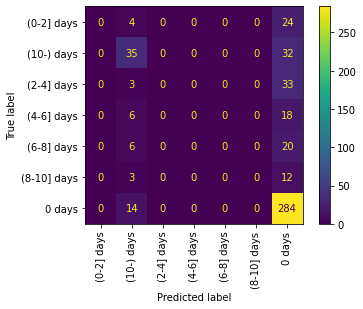

In [54]:
#Logistic Regression Model
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train.values.ravel())

y_pred = logr.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print('Accuracy:',acc)

plot_confusion_matrix(logr, X_test, y_test,xticks_rotation='vertical')  
plt.show()



Accuracy: 0.5465587044534413


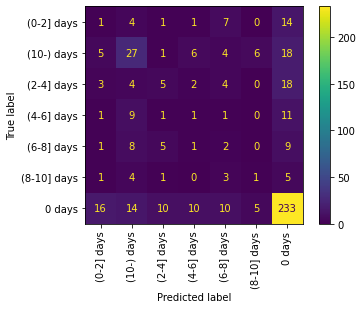

In [55]:
#Decision Tree Model
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train,y_train.values.ravel())

y_pred = dtc.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print('Accuracy:',acc)

plot_confusion_matrix(dtc, X_test, y_test,xticks_rotation='vertical')  
plt.show()

Accuracy: 0.5910931174089069


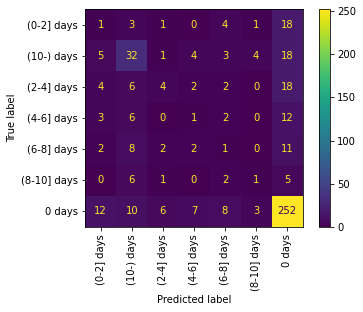

In [56]:
#Random Forest Model
rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
rfc.fit(X_train,y_train.values.ravel())

y_pred = rfc.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print('Accuracy:',acc)

plot_confusion_matrix(rfc, X_test, y_test,xticks_rotation='vertical')  
plt.show()

***Neural Network*****

In [58]:
#Train Test Split
y = pd.DataFrame(df4['DaysLate'])

X = df4.drop('DaysLate',axis='columns')

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [60]:
y_train.head()

,DaysLate
346,(2-4] days
1279,(10-) days
824,0 days
2398,0 days
1981,0 days


In [62]:
def numeric_to_categoric(x):
    if x == "0 days": return 0
    elif x == "(0-2] days": return 1
    elif x == "(2-4] days": return 2
    elif x == "(4-6] days": return 3
    elif x == "(6-8] days": return 4
    elif x == "(8-10] days": return 5
    else: return 6
y_train['DaysLate'] = y_train['DaysLate'].apply(numeric_to_categoric)
y_test['DaysLate'] = y_test['DaysLate'].apply(numeric_to_categoric)


<ipython-input-62-f982c1c92f5d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['DaysLate'] = y_train['DaysLate'].apply(numeric_to_categoric)
<ipython-input-62-f982c1c92f5d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['DaysLate'] = y_test['DaysLate'].apply(numeric_to_categoric)


In [63]:
len(X_test.columns)

8

In [64]:
len(y_test.columns)

1

In [66]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(8, input_shape=(8,), activation='relu'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

#opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)



Epoch 1/10
62/62 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4062
Epoch 2/10
62/62 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0923
Epoch 3/10
62/62 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0497
Epoch 4/10
62/62 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0497 ETA: 0s - loss: 0.0000e+00 - accuracy: 0.0437
Epoch 5/10
62/62 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0497
Epoch 6/10
62/62 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0497
Epoch 7/10
62/62 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0497
Epoch 8/10
62/62 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0497
Epoch 9/10
62/62 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0497
Epoch 10/10
62/62 [=================

In [67]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0567


[0.0, 0.056680161505937576]